In [1]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28)) # shape samples x channels x width x height

In [11]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

def train(autoencoder, data, epochs=5):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        print(f'epoch: {epoch}')
        for x, y in data:
            x = x.to(device)
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum()
            loss.backward()
            opt.step()
    return autoencoder

latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)
mnist = torchvision.datasets.MNIST('./data', transform=torchvision.transforms.ToTensor(), download=True)
data = torch.utils.data.DataLoader(mnist, batch_size=15, shuffle=True)

autoencoder = train(autoencoder, data)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4


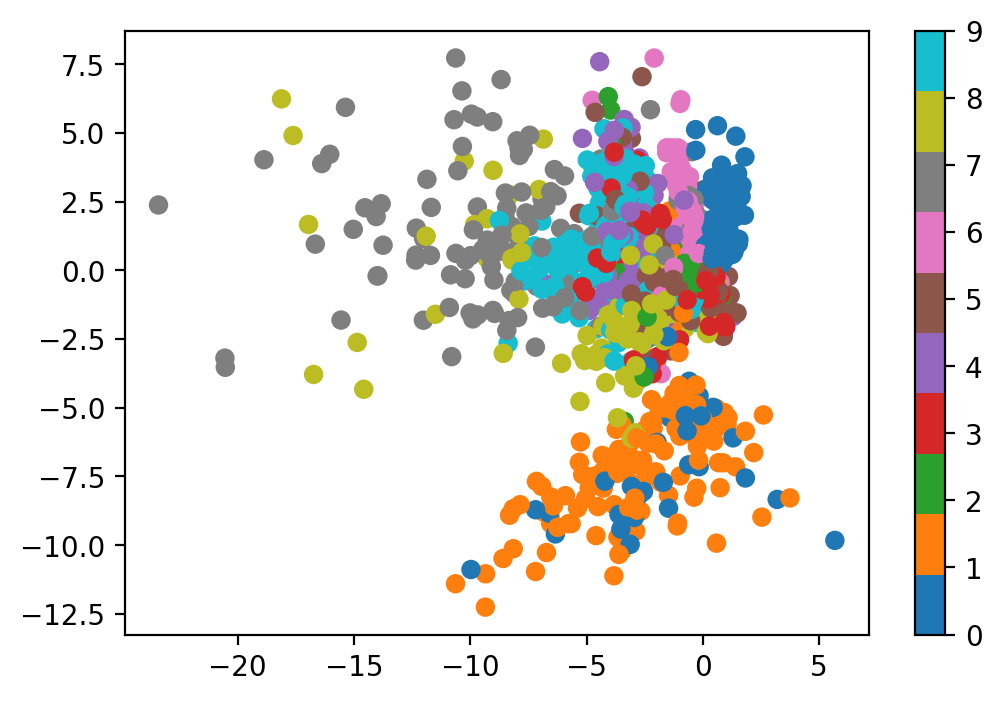

In [12]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

plot_latent(autoencoder, data)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9


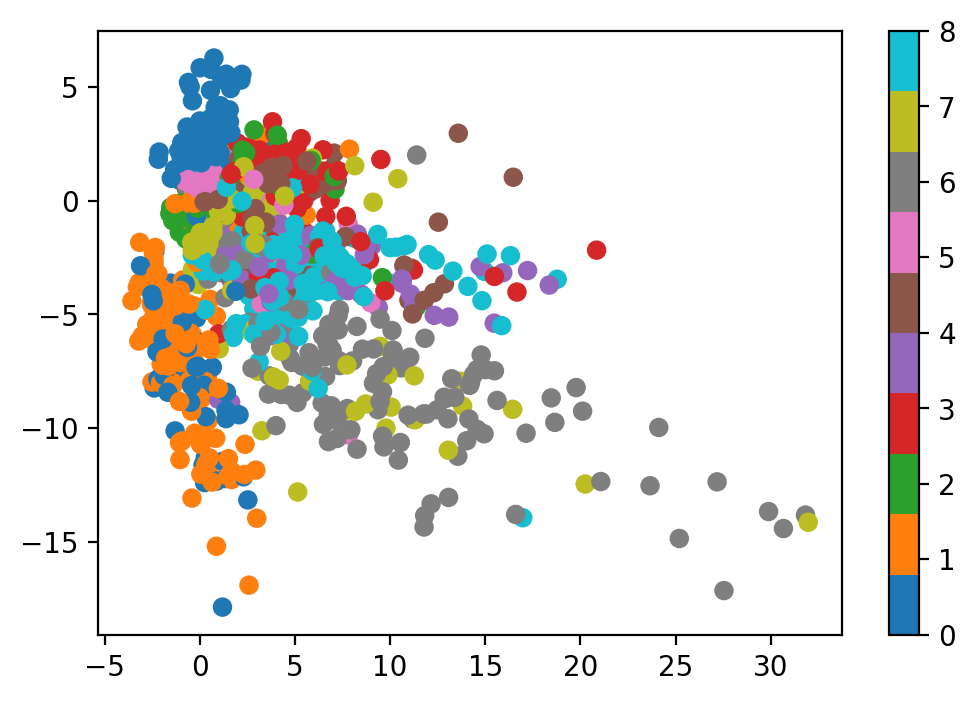

In [18]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)
mnist = torchvision.datasets.MNIST('./data', transform=torchvision.transforms.ToTensor(), download=True)
data = torch.utils.data.DataLoader(mnist, batch_size=15, shuffle=True)

autoencoder = train(autoencoder, data, epochs=10)

plot_latent(autoencoder, data)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19


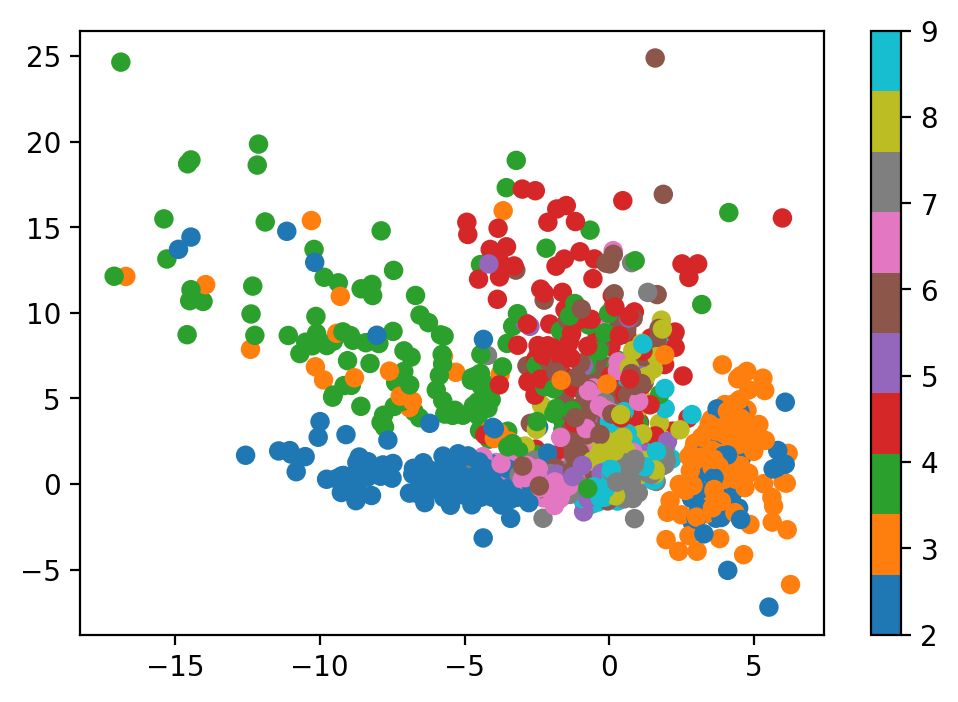

In [17]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)
mnist = torchvision.datasets.MNIST('./data', transform=torchvision.transforms.ToTensor(), download=True)
data = torch.utils.data.DataLoader(mnist, batch_size=15, shuffle=True)

autoencoder = train(autoencoder, data, epochs=20)

plot_latent(autoencoder, data)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49


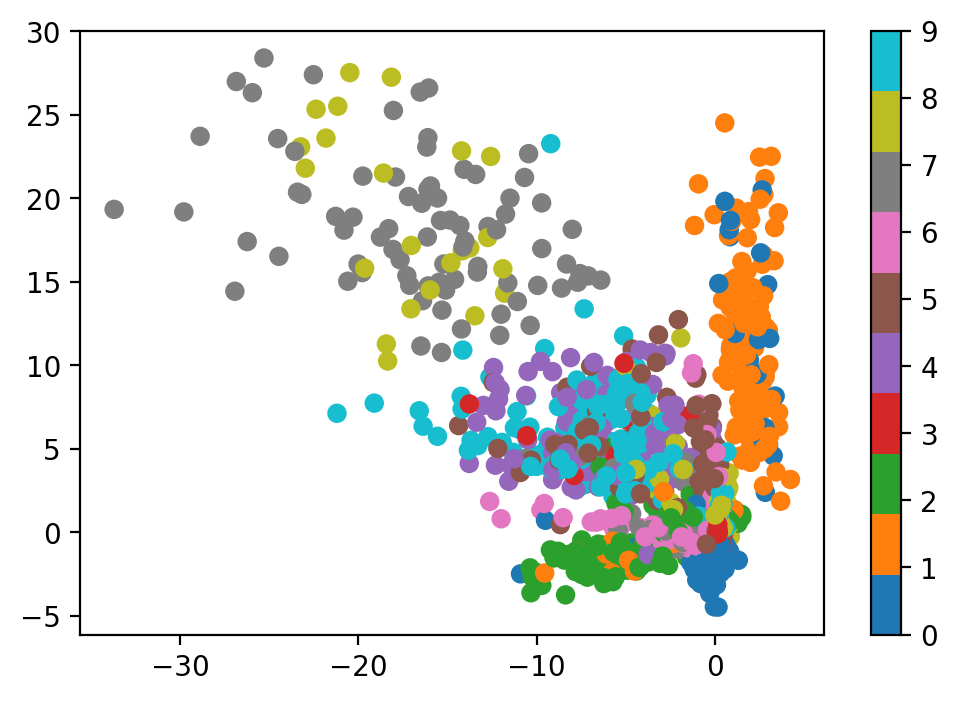

In [19]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)
mnist = torchvision.datasets.MNIST('./data', transform=torchvision.transforms.ToTensor(), download=True)
data = torch.utils.data.DataLoader(mnist, batch_size=15, shuffle=True)
autoencoder = train(autoencoder, data, epochs=50)
plot_latent(autoencoder, data)

$$\(\mathbb{KL}\left( \mathcal{N}(\mu, \sigma) \parallel \mathcal{N}(0, 1) \right) = \sum_{x \in X} \left( \sigma^2 + \mu^2 - \log \sigma - \frac{1}{2} \right)\)$$